# Implementing the CNN using Tensorflow 2.x on fashion mnist dataset

In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
import tensorflow as tf

In [16]:
print(tf.__version__)


2.1.0


In [17]:
(x_train,y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

In [18]:
# 60000 instance and an image size is 28 x 28 which is same as previous mnist datasets

x_train.shape

(60000, 28, 28)

In [19]:
# This is the resultant set and it has to be this way

y_train.shape

(60000,)

In [20]:
x_test.shape

(10000, 28, 28)

In [21]:
y_test.shape

(10000,)

In [26]:
# Importing the importing functions which will be used in CNN

from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout

In [27]:
from tensorflow.keras.models import Model

### cifar dataset can be imported the same way

---

---

In CNN shape required by N x H x W x C      ...........C means color

So, In order to make the color channel we need to make that color channel as 1 because this image is a grey scale image

In [28]:
# kind of normalization

x_train, x_test =  x_train/255.0, x_test/255.0

In [29]:
print("Shape of x_train is:-",x_train.shape)

Shape of x_train is:- (60000, 28, 28)


In [30]:
print("Shape of x_test is:-", x_test.shape)

Shape of x_test is:- (10000, 28, 28)


In [31]:
# So, as we have N x D images or data but in CNN we require N x D x C where C is color.
# So, we require the color information superfluously

# We will expand the data

x_train = np.expand_dims(x_train, -1)

In [32]:
x_train.shape

(60000, 28, 28, 1)

In [33]:
# same for x_test

x_test = np.expand_dims(x_test, -1)

In [34]:
x_test.shape

(10000, 28, 28, 1)

In [35]:
# Getting the number of classes 

k_classes = len(set(y_train))

In [36]:
print("Total number of classes are:-",k_classes)

Total number of classes are:- 10


---

# Bulding the Model using the functional API this time not with the sequential way

In [37]:
# Giving the shape of Input on the basis of first data of input data.

i = Input(shape = x_train[0].shape)

In [39]:
# Conv2D is used beacause data iss 2D in real like Height and Weight,   there is Conv1D and Conv3D as well

# 1st parameter used is feature map, second is the filter size, then strides and then activation function
# This whole calculation is applied on i type data

# Because of one channel the filter size is 1 x 3 x 3 x 32   where 32 is the number of feature maps
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)

In [40]:
# As we did functional programming in spark and pig, the resultant of this previous layer will be used
# in the next layer as in functional programming concepts.

x = Conv2D(64, (3,3), strides=2, activation='relu')(x)

In [41]:
x = Conv2D(128, (3,3), strides=2, activation='relu')(x)

In [43]:
# To convert the image into the feature vector

x = Flatten()(x)

In [44]:
# Dropout is for regularization

x = Dropout(0.2)(x)

In [45]:
# Applying the Dense layer
x = Dense(512, activation = 'relu',)(x)

In [46]:
x = Dropout(0.2)(x)

In [47]:
x = Dense(k_classes, activation = 'softmax')(x)

In [48]:
# passing inside the model constructor

# First parameter can be considered as input and second is considered as output
cnn_model_1 = Model(i, x)

----

## Compiling the model

In [50]:
cnn_model_1.compile(optimizer='adam', loss='sparse_categorical_crossentropy',
                   metrics=['accuracy'])

---

## Fitting the model with the data or say training the model

In [52]:
my_result_1 = cnn_model_1.fit(x_train, y_train, validation_data=(x_test, y_test), epochs = 20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 12s 193us/sample - loss: 0.5233 - accuracy: 0.8061 - val_loss: 0.3949 - val_accuracy: 0.8482
Epoch 2/20
60000/60000 [==============================] - 10s 166us/sample - loss: 0.3656 - accuracy: 0.8622 - val_loss: 0.3481 - val_accuracy: 0.8717
Epoch 3/20
60000/60000 [==============================] - 10s 160us/sample - loss: 0.3192 - accuracy: 0.8794 - val_loss: 0.3350 - val_accuracy: 0.8740
Epoch 4/20
60000/60000 [==============================] - 10s 161us/sample - loss: 0.2817 - accuracy: 0.8944 - val_loss: 0.3260 - val_accuracy: 0.8776
Epoch 5/20
60000/60000 [==============================] - 11s 189us/sample - loss: 0.2566 - accuracy: 0.9035 - val_loss: 0.2978 - val_accuracy: 0.8919
Epoch 6/20
60000/60000 [==============================] - 11s 191us/sample - loss: 0.2326 - accuracy: 0.9117 - val_loss: 0.2993 - val_accuracy: 0.8913
Epoch 7/20
60000/60000 [====================

---

### Plotting the loss per iteration and it should decrease

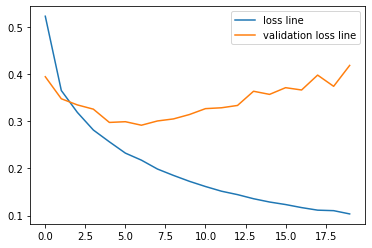

In [53]:
plt.plot(my_result_1.history['loss'],label = 'loss line')
plt.plot(my_result_1.history['val_loss'],label = 'validation loss line')

plt.legend()

### Did not perform that great in case of validation loss, one of reason is also that fashion mnist dataset is more tought than mnist dataset. You can call it overfitting as well.

---

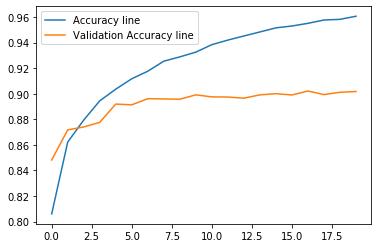

In [55]:
### Plotting the accuracy per Iteration

plt.plot(my_result_1.history['accuracy'], label = 'Accuracy line')
plt.plot(my_result_1.history['val_accuracy'], label = 'Validation Accuracy line')

plt.legend()

### This also shows that in later Iteration of the model epochs the accuracy start to decrease

---

---

## Plotting the confusion matrix


In [69]:
from sklearn.metrics import confusion_matrix

In [57]:
import itertools

In [58]:
def plot_confusion_matrix(cm, classes, normalize = False,
                         title = 'Confusion Matrix',
                         cmap = plt.cm.Blues):
    
    """
    This function prints and plots the confusion matrix. 
    Normalization can be applied by setting 'normalize=True'.
    """
    
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized Confusion Matrix")
        
    else:
        print("Confusion Matrix, without Normalization")
        
    print(cm)
    
    
    plt.imshow(cm, interpolation = 'nearest', cmap=cmap)
    plt.title(title)
    
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    
    plt.xticks(tick_marks, classes, rotation = 45)
    plt.yticks(tick_marks, classes)
    
    
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                horizontalalignment='center',
                color="white" if cm[i, j] > thresh else 'black')
    
    
    plt.tight_layout()
    plt.ylabel("True Label")
    plt.xlabel("Predicted Label")
    
    plt.show()
    


Confusion Matrix, without Normalization
[[855   0  20  19   3   2  96   0   5   0]
 [  2 976   2  13   3   0   2   0   2   0]
 [ 23   0 827  12  57   0  78   0   3   0]
 [ 16   4  11 912  30   0  26   0   1   0]
 [  2   1  47  26 857   0  66   0   1   0]
 [  0   0   0   1   0 974   1  16   0   8]
 [103   1  55  25  80   1 724   0  11   0]
 [  0   0   0   0   0  11   0 976   0  13]
 [  4   0   5   4   4   2   6   2 972   1]
 [  0   0   0   1   0   6   1  48   0 944]]


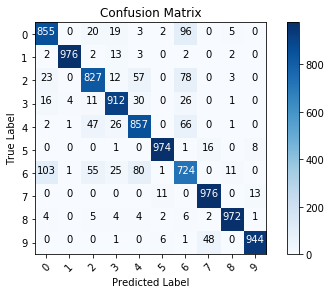

In [79]:

p_test = cnn_model_1.predict(x_test).argmax(axis =1) 
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))

In [87]:
# Now, performing the label mapping 

my_labels = '''T-shirt/Top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split()

In [88]:
# We will get a list of these dresses

my_labels

['T-shirt/Top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle',
 'boot']

---

### Checking some miss classification

In [89]:
misclassified_idx = np.where(p_test!=y_test)[0]

In [90]:
misclassified_idx

array([  23,   25,   26,   27,   29,   42,   43,   44,   48,   49,   66,
         67,   68,  103,  117,  135,  147,  150,  153,  219,  222,  239,
        244,  247,  248,  271,  285,  316,  325,  359,  361,  374,  378,
        381,  382,  389,  392,  394,  410,  425,  437,  441,  452,  454,
        457,  485,  529,  565,  569,  587,  595,  607,  634,  639,  651,
        659,  670,  681,  685,  688,  689,  711,  716,  724,  732,  753,
        760,  764,  787,  817,  828,  851,  877,  881,  887,  890,  893,
        904,  905,  909,  921,  937,  965,  967,  971,  976,  977,  979,
       1000, 1004, 1005, 1029, 1046, 1051, 1056, 1064, 1066, 1071, 1082,
       1111, 1124, 1131, 1139, 1142, 1160, 1162, 1165, 1191, 1194, 1197,
       1210, 1217, 1231, 1251, 1254, 1280, 1285, 1287, 1293, 1294, 1300,
       1305, 1306, 1312, 1326, 1329, 1353, 1356, 1387, 1388, 1396, 1399,
       1408, 1425, 1440, 1450, 1455, 1460, 1462, 1469, 1482, 1496, 1501,
       1502, 1504, 1509, 1522, 1528, 1533, 1543, 15

In [91]:
# randomly selecting one data from all those misclassified data

i = np.random.choice(misclassified_idx)

In [92]:
i

2252

Text(0.5, 1.0, 'True Label: Coat Predicted Shirt')

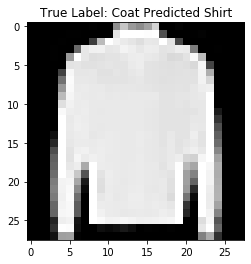

In [93]:
plt.imshow(x_test[i].reshape(28,28), cmap = 'gray')

plt.title("True Label: %s Predicted %s" %(my_labels[y_test[i]], my_labels[p_test[i]]))